## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline
import matplotlib.patches as mpatches

# Reports
import pandas_profiling


## Load data

In [3]:
# Use header=1 to skip the first row of csv

data = pd.read_csv("default of credit card clients.csv",header=1)
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


### Now the data is loaded properly into dataframe. Let's examine the data.

## Data Pre-processing and Analysis


1. Check the total number of rows and columns
2. Check the column names and index
3. Check the data types of all columns
4. Check for null and missing values in any of the columns
5. Check for duplicates in data
6. Check for inconsistencies in column names, rename if necesssary
7. Drop any irrelavant column from the dataframe
8. Descriptive statistics for all numerical columns to understand the data
9. Label encode or one hot encode the Categorical columns 
10. Correlation matrix between all columns to gain insight into data
11. Visualization and statistics about each variable to understand it better- Can use Pandas Profiling Report
12. Univariate Analysis - Check the data distribution of each variable, unique values and counts of Categorical variables - histogram/count plot,fix unaccounted data
13. Bivariate Analysis- Check the relationship between 2 variables


### 1. Check the total number of rows and columns

In [4]:
data.shape

(30000, 25)

#### OBSERVATION: There are 30,000 records and 25 columns

### 2. Check the column names and Index 

In [5]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

#### OBSERVATION: There are 25 columns in the data source

### 3. Check the data types of all columns 

In [6]:
data.info()               # list all columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

#### OBSERVATION: All the columns are non-null and 3 columns are Object data types. 

###  4. Check for null and missing values in any of the columns 

In [7]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#### OBSERVATION: There are no nulls/ missing values in  the data

### 5. Check for duplicates in data 

In [8]:
data.duplicated().sum()

0

#### OBSERVATION: There are no duplicates

###  6. Check for column name inconsistencies

### Rename column names to be consistent and user friendly 

In [9]:
# SEX can be renamed as GENDER
# PAY_0 can be renamed to PAY_1
# default payment next month can be renamed as DEFAULT_STATUS

data.rename(columns = {'SEX': 'GENDER',
                       'PAY_0':'PAY_1',
                       'default payment next month': 'DEFAULT_STATUS'}, inplace = True) 

data


,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
29996,29997,150000,male,high school,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,not default
29997,29998,30000,male,university,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,default
29998,29999,80000,male,high school,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,default


#### OBSERVATION: PAY_0 is inconsistent, default payment next month not user friendly and hence renamed

### 7. Drop any irrelevent columns from the dataframe

ID column is irrelevant to whether a customer will be default/ not default and therefore can be dropped

In [10]:
data.drop('ID', axis=1, inplace=True) # Drop column ID

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   LIMIT_BAL       30000 non-null  int64 
 1   GENDER          30000 non-null  object
 2   EDUCATION       30000 non-null  object
 3   MARRIAGE        30000 non-null  int64 
 4   AGE             30000 non-null  int64 
 5   PAY_1           30000 non-null  int64 
 6   PAY_2           30000 non-null  int64 
 7   PAY_3           30000 non-null  int64 
 8   PAY_4           30000 non-null  int64 
 9   PAY_5           30000 non-null  int64 
 10  PAY_6           30000 non-null  int64 
 11  BILL_AMT1       30000 non-null  int64 
 12  BILL_AMT2       30000 non-null  int64 
 13  BILL_AMT3       30000 non-null  int64 
 14  BILL_AMT4       30000 non-null  int64 
 15  BILL_AMT5       30000 non-null  int64 
 16  BILL_AMT6       30000 non-null  int64 
 17  PAY_AMT1        30000 non-null  int64 
 18  PAY_AM

#### OBSERVATION: ID column is irrelevant and dropped

### 8. Descriptive Statistics 

In [11]:
# Statistics for all numerical columns

data.describe()

,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [12]:
data ['GENDER'].describe()

count      30000
unique         2
top       female
freq       18112
Name: GENDER, dtype: object

In [13]:
data ['EDUCATION'].describe()

count          30000
unique             4
top       university
freq           14030
Name: EDUCATION, dtype: object

In [14]:
data ['DEFAULT_STATUS'].describe()

count           30000
unique              2
top       not default
freq            23364
Name: DEFAULT_STATUS, dtype: object

#### OBSERVATION: 
1. 50% of the Customers are below 34 yrs of age
2. 50% of the Customers has a credit limit less than NT 140000 dollar
3. There are more female customers than male
4. There are less default customers than non default customers.
5. 50% of the customers have latest Outstanding amount of 22,381NT$

###  9. Encode Categorical Variables

#### One Hot encoding the Categorical columns- Gender, Education, Default status

In [15]:
encode_data= pd.get_dummies(data, prefix=['GENDER', 'EDUCATION','STATUS'], columns=['GENDER', 'EDUCATION','DEFAULT_STATUS'])
encode_data

,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,GENDER_female,GENDER_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,STATUS_default,STATUS_not default
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,1,0,0,0,0,1,1,0
1,120000,2,26,-1,2,0,0,0,2,2682,...,0,2000,1,0,0,0,0,1,1,0
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,5000,1,0,0,0,0,1,0,1
3,50000,1,37,0,0,0,0,0,0,46990,...,1069,1000,1,0,0,0,0,1,0,1
4,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,39,0,0,0,0,0,0,188948,...,5000,1000,0,1,0,1,0,0,0,1
29996,150000,2,43,-1,-1,-1,-1,0,0,1683,...,0,0,0,1,0,1,0,0,0,1
29997,30000,2,37,4,3,2,-1,0,0,3565,...,2000,3100,0,1,0,0,0,1,1,0
29998,80000,1,41,1,-1,0,0,0,-1,-1645,...,52964,1804,0,1,0,1,0,0,1,0


#### OBSERVATION:

After one hot encoding, 

1. GENDER column is split into GENDER_female and GENDER_male
2. EDUCATION column is split into EDUCATION_graduate school, EDUCATION_high school, EDUCATION_university and EDUCATION_other
3. DEFAULT_STATUS column is split into STATUS_default and STATUS_not default

### 10. Correlation Matrix

In [16]:
# Correlation matrix is calculated only for numerical columns

corrmat=encode_data.corr()
corrmat

,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,GENDER_female,GENDER_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,STATUS_default,STATUS_not default
LIMIT_BAL,1.000000,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,...,0.217202,0.219595,0.024755,-0.024755,0.258777,-0.139686,0.013420,-0.147530,-0.153520,0.153520
MARRIAGE,-0.108139,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,...,-0.001205,-0.006641,-0.031389,0.031389,0.142129,-0.110845,-0.008386,-0.051797,-0.024339,0.024339
AGE,0.144713,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,...,0.022850,0.019478,-0.090874,0.090874,-0.100423,0.231252,0.008982,-0.077626,0.013890,-0.013890
PAY_1,-0.271214,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,...,-0.058190,-0.058673,-0.057643,0.057643,-0.142720,0.058902,-0.024937,0.099177,0.324794,-0.324794
PAY_2,-0.296382,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,...,-0.037093,-0.036500,-0.070771,0.070771,-0.169215,0.064590,-0.033118,0.122364,0.263551,-0.263551
PAY_3,-0.286123,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,...,-0.035863,-0.035861,-0.066096,0.066096,-0.160209,0.062461,-0.034435,0.115644,0.235253,-0.235253
PAY_4,-0.267460,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,...,-0.033590,-0.026565,-0.060173,0.060173,-0.152402,0.058382,-0.030998,0.110340,0.216614,-0.216614
PAY_5,-0.249411,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,...,-0.033337,-0.023027,-0.055064,0.055064,-0.138709,0.049577,-0.028822,0.103218,0.204149,-0.204149
PAY_6,-0.235195,0.034345,-0.048773,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.207373,...,-0.046434,-0.025299,-0.044008,0.044008,-0.125123,0.041370,-0.035733,0.098013,0.186866,-0.186866
BILL_AMT1,0.285430,-0.023472,0.056239,0.187068,0.234887,0.208473,0.202812,0.206684,0.207373,1.000000,...,0.167026,0.179341,-0.033642,0.033642,-0.024045,-0.022006,0.036364,0.030323,-0.019644,0.019644


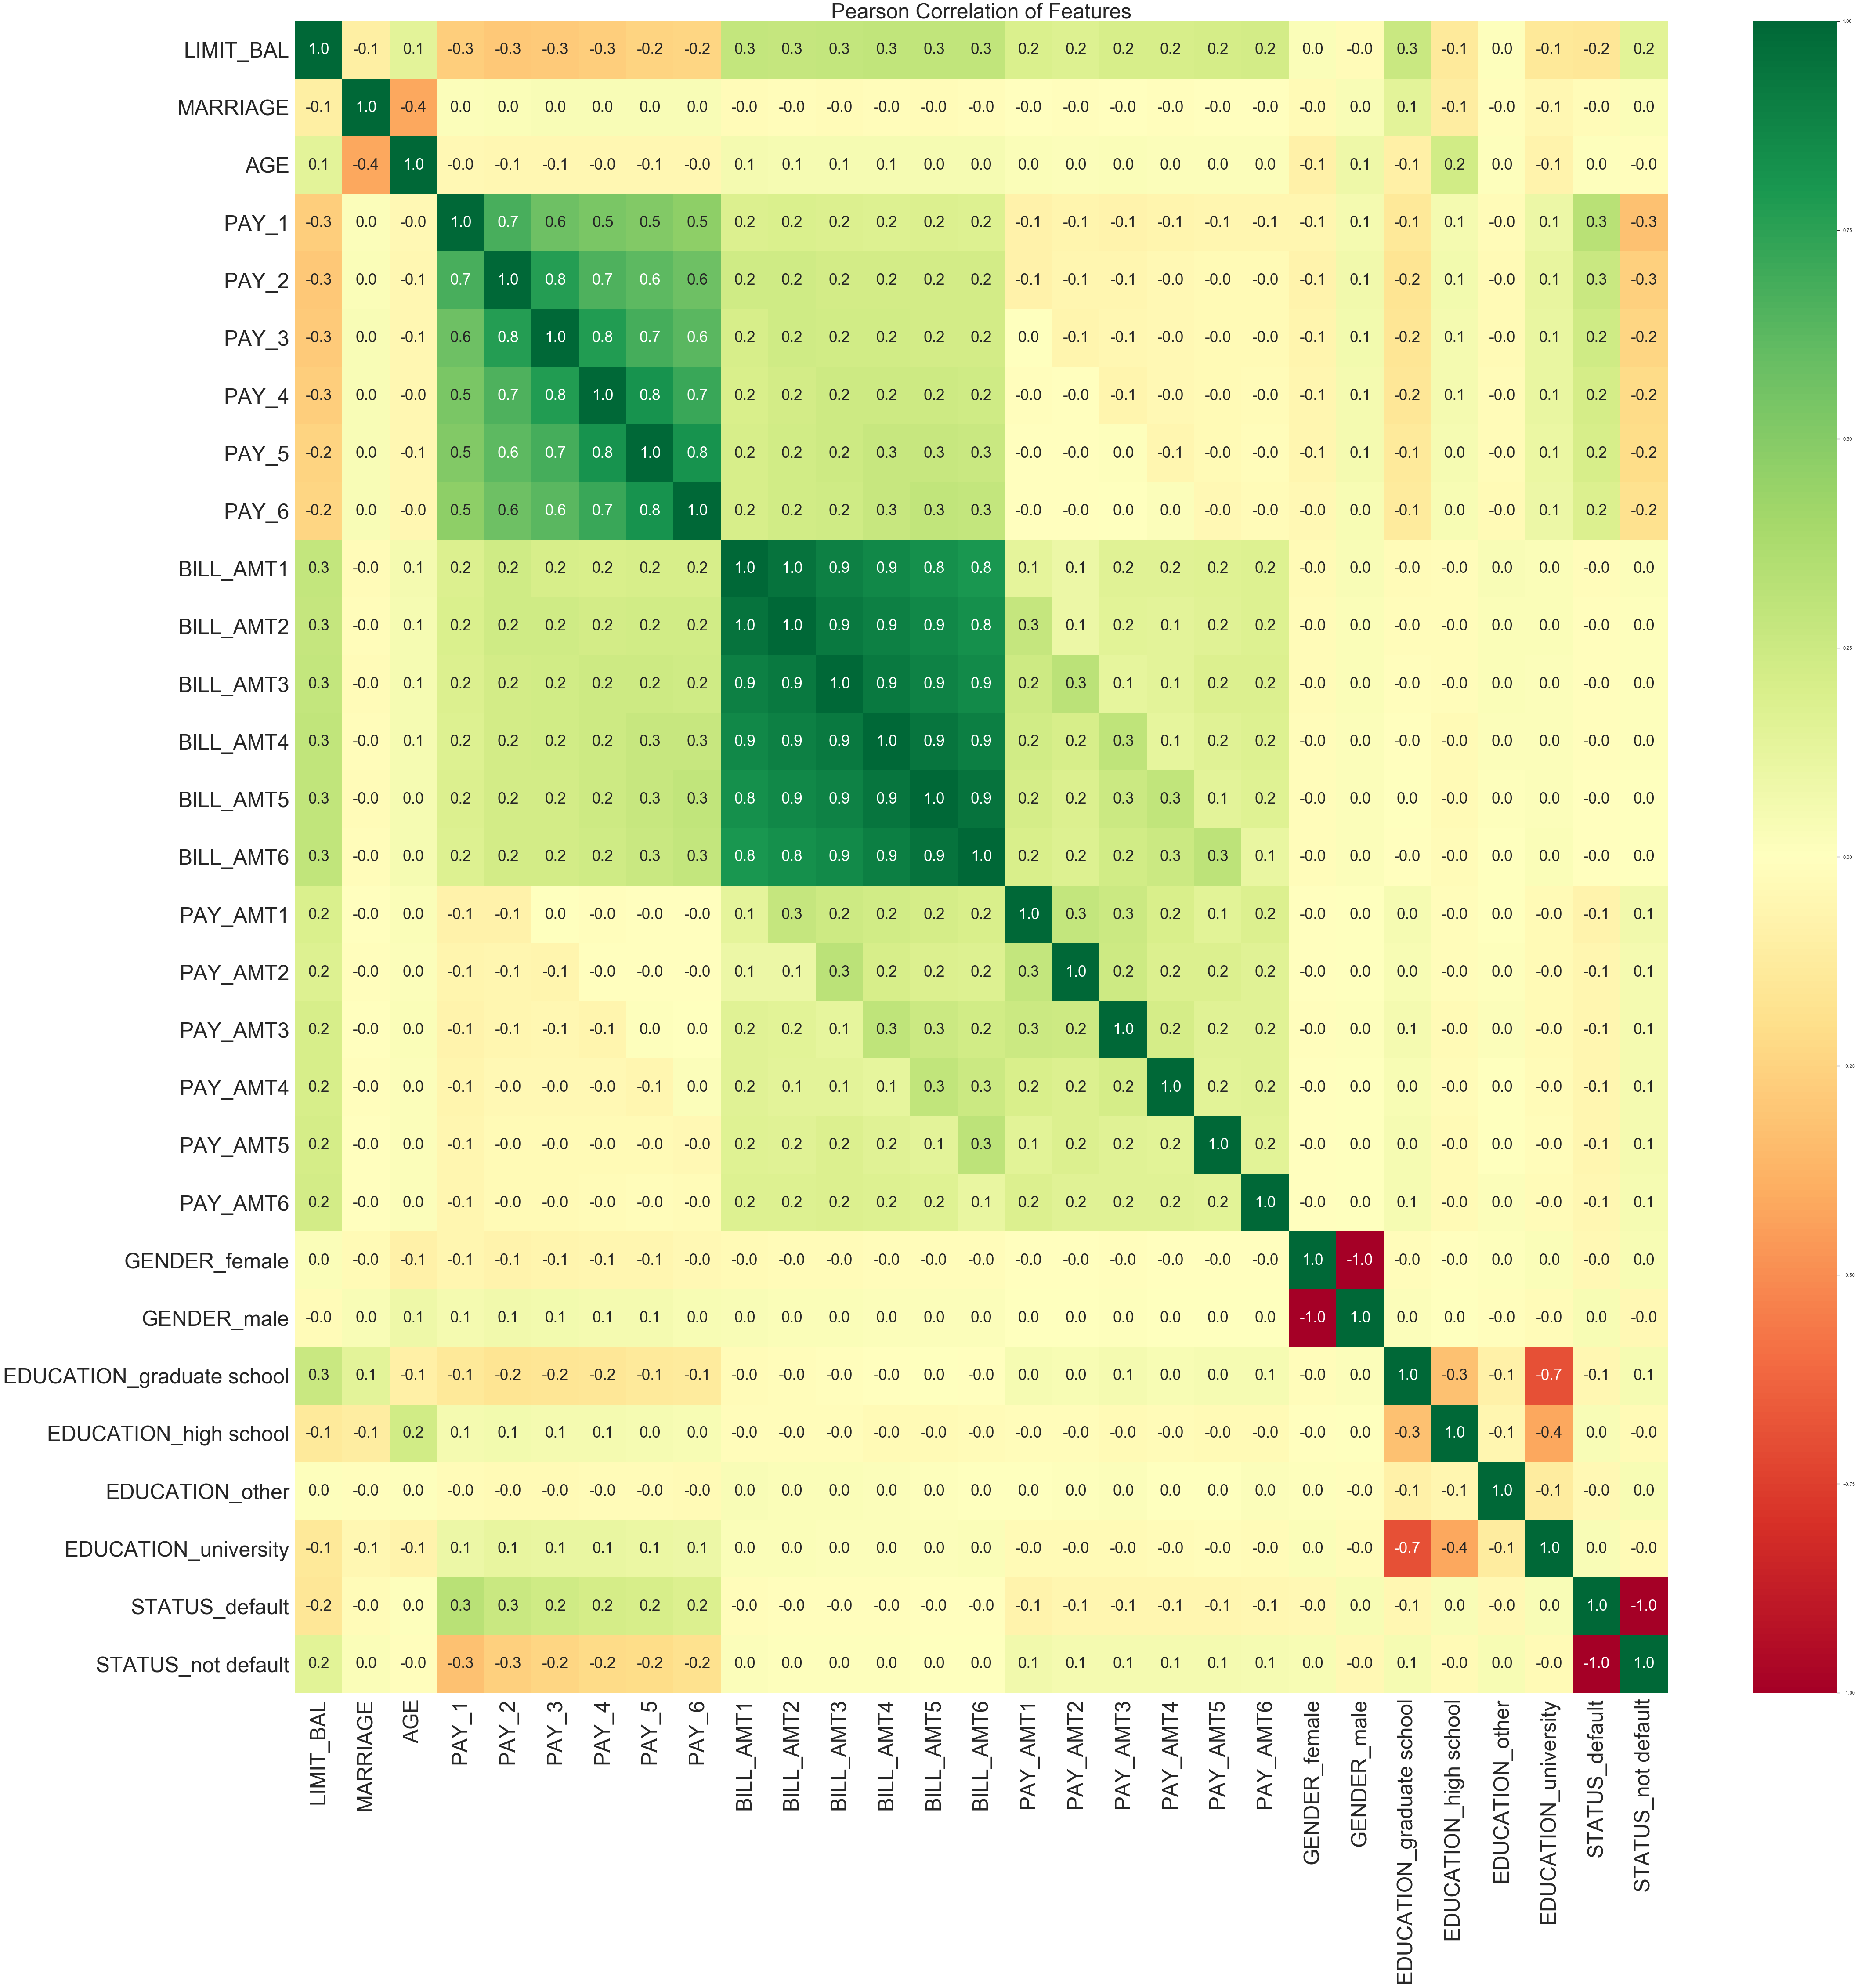

In [17]:
## Visualize the Correlation matrix

# Configure x and y axis
sns.set()
plt.figure(figsize=(70,70))
plt.xticks(fontsize=48)
plt.yticks(fontsize=48)
plt.title('Pearson Correlation of Features', size =48)

# Plotting the data using heatmap
g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn",annot_kws={"size": 35},fmt=".1f")

### OBSERVATION:

1. Repayment  status(PAY_1 to PAY_6) are highly correlated to each other
2. Bill amount (BILL_AMT1 to BILL_AMT6) are highly correlated to each other
3. STATUS_default is correlated to PAY_1 to PAY_6
4. STATUS_not default is correlated to LIMIT_BAL
5. Repayment status is not correlated to LIMIT_BAL


### 11. Pandas Profiling Report

In [18]:
from pandas_profiling import ProfileReport
data.profile_report()

### 12. UNIVARIATE ANALYSIS: Check the data distribution of each feature 

### Check the unique values of Categorical variables

Categorical variables in our data are:

1. GENDER
2. MARRIAGE
3. EDUCATION
4. DEFAULT_STATUS
5. PAY_0 to PAY_6 columns

### Feature: GENDER

In [19]:
data['GENDER'].value_counts()

female    18112
male      11888
Name: GENDER, dtype: int64

Text(0.5, 1.0, 'Number of Customers by Gender')

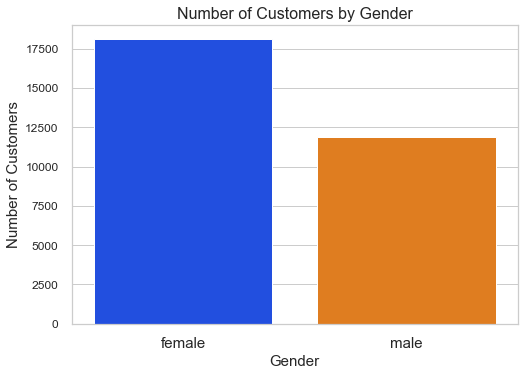

In [20]:
# Using Seaborn Countplot to Visualize the same

sns.set(style="whitegrid")
sns.countplot(x="GENDER",data =data, palette = 'bright')


# Configure X and Y axis
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)

# Set the title
plt.title('Number of Customers by Gender',fontsize=16)

#### OBSERVATION: 60% of the Customers are female (18112 females)

### Feature: MARRIAGE

In [21]:
# Make a copy of the dataframe and map the values to the corresponding meaning just to plot.
# Will use this dataframe only for plotting

marriage_data= data.copy()
marriage_data["MARRIAGE"].replace({1: "Married",
                                   2: "Single",
                                   3: "Divorced",
                                   0: "Others"}, inplace=True)
marriage_data['MARRIAGE'].value_counts()

Single      15964
Married     13659
Divorced      323
Others         54
Name: MARRIAGE, dtype: int64

Text(0.5, 1.0, 'Number of Customers by Marital status')

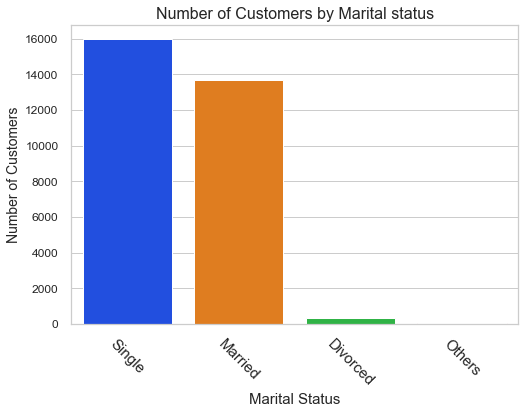

In [22]:
# To plot from highest to lowest
order = marriage_data['MARRIAGE'].value_counts().index

# Plotting in Seaborn
sns.set(style="whitegrid")
sns.countplot(x="MARRIAGE",data =marriage_data, palette="bright", order=order)

# Configure X and Y axis
plt.xticks(fontsize=15,rotation=-45)
plt.yticks(fontsize=12)
plt.xlabel("Marital Status", fontsize=15)
plt.ylabel("Number of Customers", fontsize=14)

# Set the title
plt.title('Number of Customers by Marital status',fontsize=16)

#### OBSERVATION: 53.2% of the Customers are Single and 45% are married.

### Feature: EDUCATION

In [23]:
data['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
other                468
Name: EDUCATION, dtype: int64

Text(0.5, 1.0, 'Number of Customers by Education')

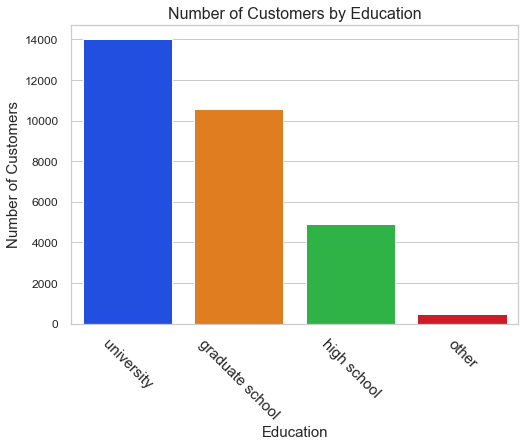

In [24]:
# Plot the chart
sns.countplot(x='EDUCATION',data=data, palette="bright")

# Configure X and Y axis
plt.xticks(fontsize=15,rotation=-45)
plt.yticks(fontsize=12)
plt.xlabel("Education", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)

# Set the title
plt.title('Number of Customers by Education',fontsize=16)

#### OBSERVATION: 46.76% of the Customers have studied at University, 35.28% are graduates 

### Feature: DEFAULT_STATUS

In [25]:
data['DEFAULT_STATUS'].value_counts()

not default    23364
default         6636
Name: DEFAULT_STATUS, dtype: int64

Text(0.5, 1.0, 'Number of Customers by Default status')

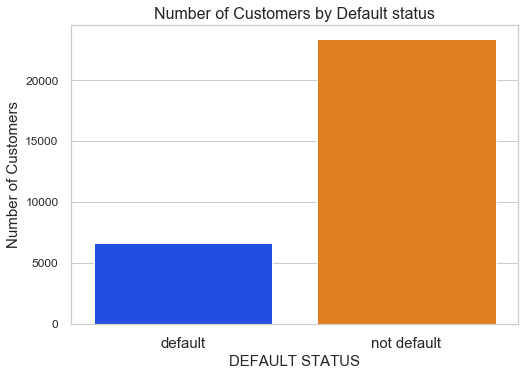

In [26]:
# Plot the chart
sns.countplot(x="DEFAULT_STATUS", data=data, palette="bright")

# Configure X and Y axis
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("DEFAULT STATUS", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)

# Set the title
plt.title('Number of Customers by Default status',fontsize=16)

#### OBSERVATION: Only 22.12% of the Customers defaulted.  There are less default customers than non-default

### Feature: AGE

In [27]:
Age_count= data.copy()
Age_count['Age_group'] = pd.cut(x = Age_count['AGE'], bins = [20,30,40,50,60,70,80],
                                       labels = ['20-30', '31-40','41-50','51-60','61-70','71-80'])
Age_count['Age_group'].value_counts()

20-30    11013
31-40    10713
41-50     6005
51-60     1997
61-70      257
71-80       15
Name: Age_group, dtype: int64

Text(0.5, 1.0, "Distribution of Customer's Age")

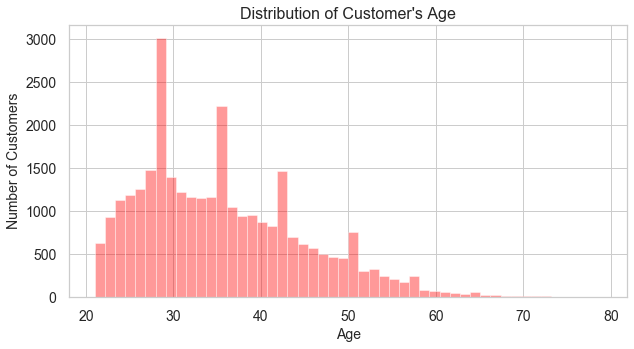

In [28]:
plt.figure(figsize=(10,5)) 
sns.set(style="whitegrid")

# Plot the chart
sns.distplot(data['AGE'], kde=False, rug=False, color="red");

# Configure X and Y axis
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set title
plt.title ("Distribution of Customer's Age", fontsize=16)

Text(0.5, 1.0, 'Number of Customers by Age')

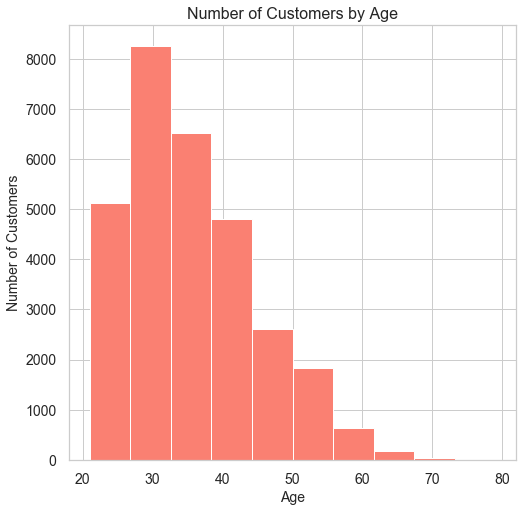

In [29]:
plt.figure(figsize=(8,8)) 

# Plot the chart
plt.hist(data['AGE'],color="Salmon")

# Configure X and Y axis
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the title
plt.title("Number of Customers by Age", fontsize=16)

#### OBSERVATION: Many of the customers are between the age group 30-40.

### Feature: LIMIT_BAL

Text(0.5, 1.0, 'Number of Customers by Credit limit')

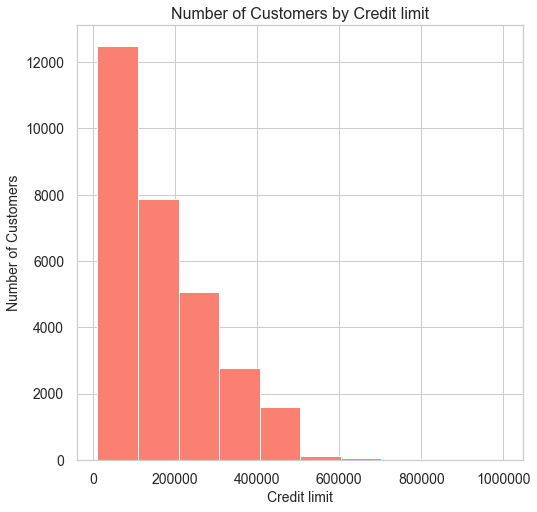

In [30]:
plt.figure(figsize=(8,8)) 

# Plot the graph
plt.hist(data['LIMIT_BAL'],color="Salmon")

# Configure X and Y axis
plt.xlabel('Credit limit', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the title
plt.title("Number of Customers by Credit limit", fontsize=16)

#### OBSERVATION: Many customers have credit limit less than 100k

### Feature: PAY_1 to PAY_6 

### Setting up 6 subplots for 6 columns

Text(0.5, 1.0, 'PAY_6 counts')

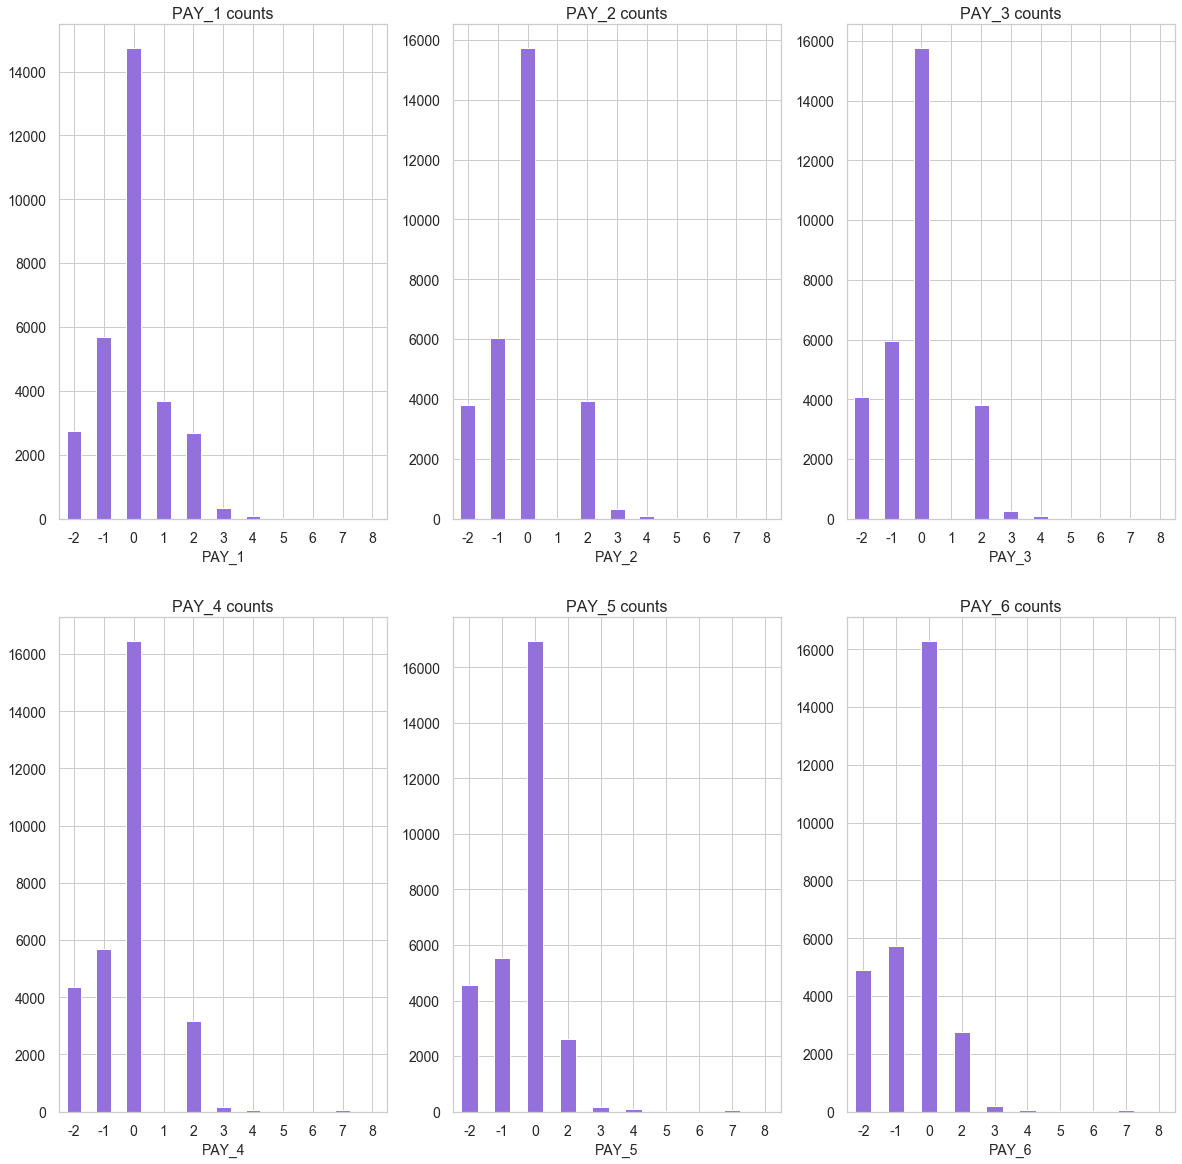

In [31]:

# Set up a grid of plots
fig = plt.figure(figsize=(20,20)) 
fig_dims = (2,3)


# Plot PAY_1 counts
plt.subplot2grid(fig_dims, (0, 0))
data.groupby('PAY_1')['PAY_1'].count().plot(kind='bar', 
                                         title='PAY_1 Counts',fontsize=14,color=['mediumpurple'])
plt.xticks(rotation=0)
plt.xlabel('PAY_1', fontsize=14)
plt.title("PAY_1 counts", fontsize=16)


# Plot PAY_2 counts
plt.subplot2grid(fig_dims, (0, 1))
data.groupby('PAY_2')['PAY_2'].count().plot(kind='bar', 
                                       title='PAY_2 Counts',fontsize=14,color=['mediumpurple'])
plt.xticks(rotation=0)
plt.xlabel('PAY_2', fontsize=14)
plt.title("PAY_2 counts", fontsize=16)

# Plot PAY_3 counts
plt.subplot2grid(fig_dims, (0,2))
data.groupby('PAY_3')['PAY_3'].count().plot(kind='bar', 
                                    title='PAY_3 Counts',fontsize=14,color=['mediumpurple'])
plt.xticks(rotation=0)
plt.xlabel('PAY_3', fontsize=14)
plt.title("PAY_3 counts", fontsize=16)

# Plot PAY_4 counts
plt.subplot2grid(fig_dims, (1, 0))
data.groupby('PAY_4')['PAY_4'].count().plot(kind='bar', 
                                         title='PAY_4 Counts',fontsize=14,color=['mediumpurple'])
plt.xticks(rotation=0)
plt.xlabel('PAY_4', fontsize=14)
plt.title("PAY_4 counts", fontsize=16)

# Plot PAY_5 counts
plt.subplot2grid(fig_dims, (1, 1))
data.groupby('PAY_5')['PAY_5'].count().plot(kind='bar', 
                                         title='PAY_5 Counts',fontsize=14,color=['mediumpurple'])
plt.xticks(rotation=0)
plt.xlabel('PAY_5', fontsize=14)
plt.title("PAY_5 counts", fontsize=16)


# Plot PAY_6 counts
plt.subplot2grid(fig_dims, (1, 2))
data.groupby('PAY_6')['PAY_6'].count().plot(kind='bar', 
                                         title='PAY_6 Counts',fontsize=14,color=['mediumpurple'])
plt.xticks(rotation=0)
plt.xlabel('PAY_6', fontsize=14)
plt.title("PAY_6 counts", fontsize=16)



#### OBSERVATION: PAY_1 to PAY_6 has 0 as repayment status for most of the customers

### Feature: BILL_AMT1 to BILL_AMT6

### 6 Subplots for 6 months bill amount

#### Setting y axis to log scale as we have wide range of values for bill amount

(array([-500000., -250000.,       0.,  250000.,  500000.,  750000.,
        1000000., 1250000.]),
 <a list of 8 Text xticklabel objects>)

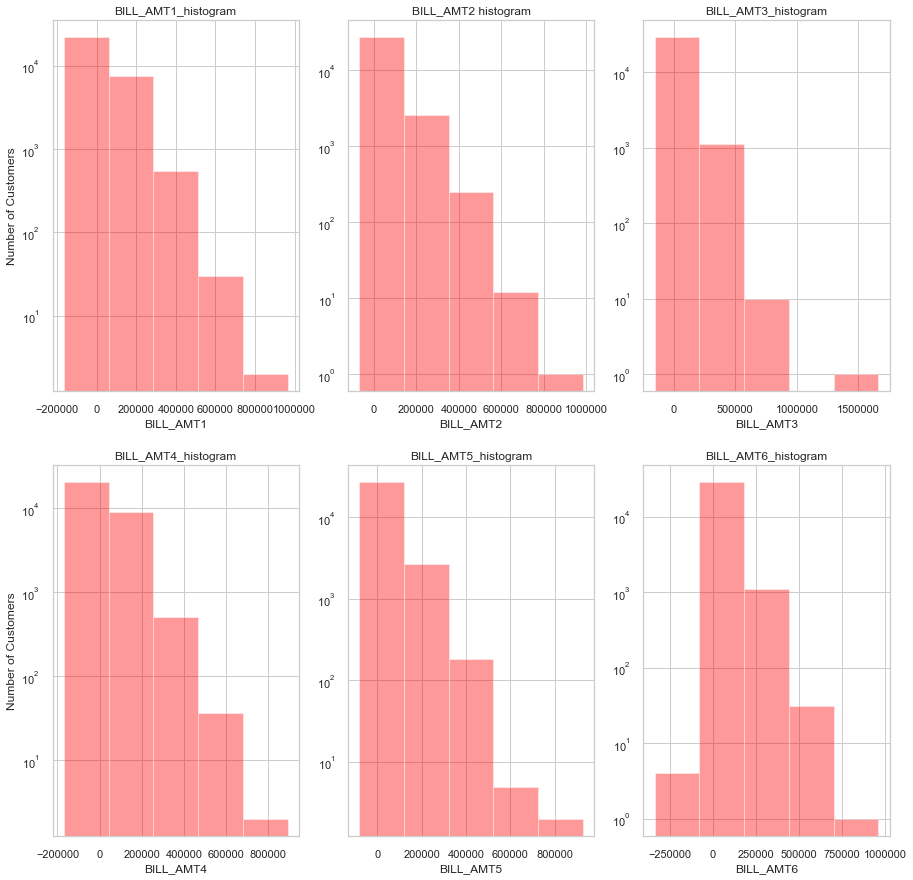

In [32]:

# Set up a grid of plots
fig = plt.figure(figsize=(15,15)) 
fig_dims = (2,3)

# Plot BILL_AMT1 counts
plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(data['BILL_AMT1'],bins=5, kde=False, rug=False, color="red");
plt.yscale('log',nonposy='clip')
plt.ylabel ("Number of Customers")
plt.title("BILL_AMT1_histogram")
plt.xticks(rotation=0)

# Plot BILL_AMT2 counts
plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(data['BILL_AMT2'],bins=5, kde=False, rug=False,color='red')
plt.yscale('log',nonposy='clip')
#plt.ylabel ("Number of Customers")
plt.title("BILL_AMT2 histogram")
plt.xticks(rotation=0)

# Plot BILL_AMT3 counts
plt.subplot2grid(fig_dims, (0,2))
sns.distplot(data['BILL_AMT3'],bins=5, kde=False, rug=False, color='red');
plt.yscale('log',nonposy='clip')
#plt.ylabel ("Number of Customers")
plt.title("BILL_AMT3_histogram")
plt.xticks(rotation=0)

# Plot BILL_AMT4 counts
plt.subplot2grid(fig_dims, (1, 0))
sns.distplot(data['BILL_AMT4'],bins=5, kde=False, rug=False, color='red');
plt.yscale('log',nonposy='clip')
plt.ylabel ("Number of Customers")
plt.title("BILL_AMT4_histogram")
plt.xticks(rotation=0)


# Plot BILL_AMT5 counts
plt.subplot2grid(fig_dims, (1, 1))
sns.distplot(data['BILL_AMT5'],bins=5, kde=False, rug=False, color='red');
plt.yscale('log',nonposy='clip')
#plt.ylabel ("Number of Customers")
plt.title("BILL_AMT5_histogram")
plt.xticks(rotation=0)

# Plot BILL_AMT6 counts
plt.subplot2grid(fig_dims, (1, 2))
sns.distplot(data['BILL_AMT6'],bins=5, kde=False, rug=False, color='red');
plt.yscale('log',nonposy='clip')
#plt.ylabel ("Number of Customers")
plt.title("BILL_AMT6_histogram")
plt.xticks(rotation=0)




### Feature: PAY_AMT1 to PAY_AMT6


### One plot for PAY_AMT1 to PAY_AMT6 histograms

#### Setting y axis to log scale as we have wide range of values for payment amount

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.]),
 <a list of 8 Text xticklabel objects>)

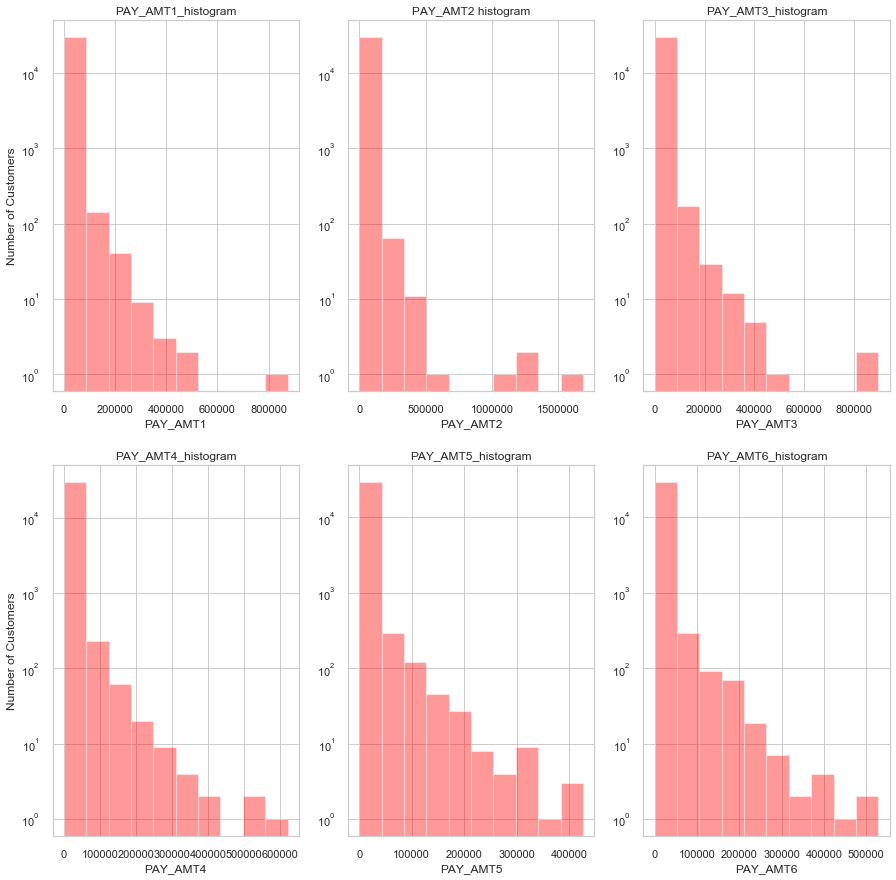

In [33]:
# Set up a grid of plots
fig = plt.figure(figsize=(15,15)) 
fig_dims = (2,3)


## Setting Y axis to log scale since the range is quite large
#and the number of customers for a particular amount is less than 100

# Plot PAY_AMT1 counts
plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(data['PAY_AMT1'],bins=10, kde=False, rug=False, color="red");
plt.title("PAY_AMT1_histogram")
plt.yscale('log',nonposy='clip')
plt.ylabel ("Number of Customers")
plt.xticks(rotation=0)

# Plot PAY_AMT2 counts
plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(data['PAY_AMT2'],bins=10, kde=False, rug=False,color='red')
plt.yscale('log',nonposy='clip')
plt.title("PAY_AMT2 histogram")
plt.xticks(rotation=0)

# Plot PAY_AMT3 counts
plt.subplot2grid(fig_dims, (0,2))
sns.distplot(data['PAY_AMT3'],bins=10, kde=False, rug=False, color='red');
plt.yscale('log',nonposy='clip')
plt.title("PAY_AMT3_histogram")
plt.xticks(rotation=0)

# Plot PAY_AMT4 counts
plt.subplot2grid(fig_dims, (1, 0))
sns.distplot(data['PAY_AMT4'],bins=10, kde=False, rug=False, color='red');
plt.yscale('log',nonposy='clip')
plt.ylabel ("Number of Customers")
plt.title("PAY_AMT4_histogram")
plt.xticks(rotation=0)


# Plot PAY_AMT5 counts
plt.subplot2grid(fig_dims, (1, 1))
sns.distplot(data['PAY_AMT5'],bins=10, kde=False, rug=False, color='red');
plt.yscale('log',nonposy='clip')
plt.title("PAY_AMT5_histogram")
plt.xticks(rotation=0)

# Plot PAY_AMT6 counts
plt.subplot2grid(fig_dims, (1, 2))
sns.distplot(data['PAY_AMT6'],bins=10, kde=False, rug=False, color='red');
plt.yscale('log',nonposy='clip')
plt.title("PAY_AMT6_histogram")
plt.xticks(rotation=0)


###  13.  BIVARIATE ANALYSIS 

### Relationship between DEFAULT_STATUS and all the variables

### Plot GENDER vs DEFAULT_STATUS

Text(0.5, 1.0, 'Number of default customers by gender')

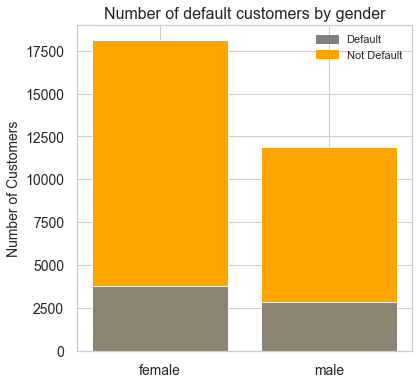

In [34]:
## Plot distribution of gender data with default, not default count

plt.figure(figsize=(6,6))
sns.set(style="whitegrid")

# Plot the chart
d  =data['GENDER'].value_counts()
x = data['GENDER'][(data['DEFAULT_STATUS']=='default')].value_counts()
plt.bar(d.index, d, align='center', color='orange')
plt.bar(x.index, x, align='center', color='gray', alpha=0.9)

# Set X and y axis labels
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the legend
gray_patch = mpatches.Patch(color='gray', label='Default')
orange_patch=mpatches.Patch(color='orange', label='Not Default')
plt.legend(handles=[gray_patch,orange_patch],loc=1)


# Set the title
plt.title ("Number of default customers by gender", fontsize=16)

In [35]:
default_Customers = data['GENDER'][data['DEFAULT_STATUS']=='default'].value_counts()
Cust_by_gender = data['GENDER'].value_counts()
print("Percentage of female and male default customers:\n", default_Customers/Cust_by_gender*100)

Percentage of female and male default customers:
 female    20.776281
male      24.167227
Name: GENDER, dtype: float64


### <span style ='color:blue'> OBSERVATION

        
#### <span style='color:blue'>  1. 20.7% Female Customers default and 24.1% Male Customers default
        
#### <span style='color:blue'> 2.Number of female default customers are more than male default customers
      
  

### Plot MARRIAGE vs. DEFAULT_STATUS

Text(0.5, 1.0, 'Number of default customers by Marital Status')

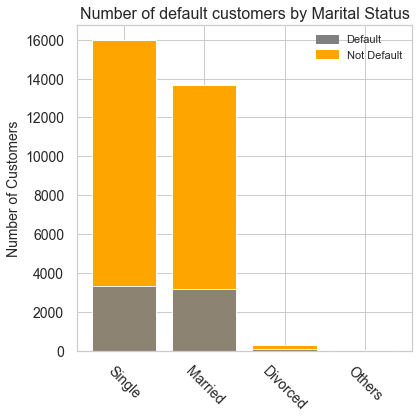

In [36]:
## Plot distribution of Marriage data with default, not default count

plt.figure(figsize=(6,6))
sns.set(style="whitegrid")

# Plot the chart
d  = marriage_data['MARRIAGE'].value_counts()
x = marriage_data['MARRIAGE'][(data['DEFAULT_STATUS']=='default')].value_counts()
plt.bar(d.index, d, align='center', color='orange')
plt.bar(x.index, x, align='center', color='gray', alpha=0.9)

# Set X and y axis labels
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14,rotation=-45)
plt.yticks(fontsize=14)

# Set the legend
gray_patch = mpatches.Patch(color='gray', label='Default')
orange_patch=mpatches.Patch(color='orange', label='Not Default')
plt.legend(handles=[gray_patch,orange_patch],loc=1)


# Set the title
plt.title ("Number of default customers by Marital Status", fontsize=16)

In [37]:
default_Cust = marriage_data['MARRIAGE'][data['DEFAULT_STATUS']=='default'].value_counts()
Cust_by_Maritalstatus = marriage_data['MARRIAGE'].value_counts()
print("Percentage of Single and married default customers:\n", default_Cust/Cust_by_Maritalstatus*100)

Percentage of Single and married default customers:
 Single      20.928339
Married     23.471704
Divorced    26.006192
Others       9.259259
Name: MARRIAGE, dtype: float64


### <span style='color:blue'>OBSERVATION:  
#### <span style='color:blue'>1. 26% of divorced Customers, 23.4% of married Customers and 20.9% of Single Customers default
#### <span style='color:blue'>2. Number of default Single customers are more

### Plot EDUCATION vs. DEFAULT_STATUS

Text(0.5, 1.0, 'Number of default customers by Education')

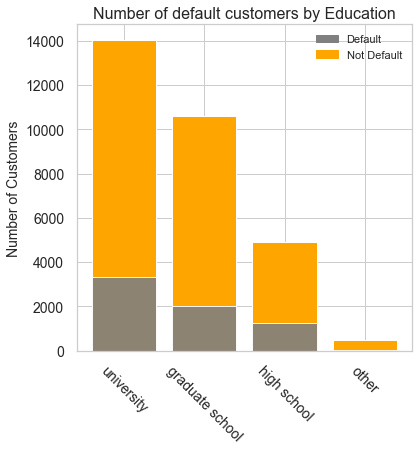

In [38]:
## Plot distribution of Education data with default, not default count

plt.figure(figsize=(6,6))
sns.set(style="whitegrid")

# Plot the graph
d  = data['EDUCATION'].value_counts()
x = data['EDUCATION'][(data['DEFAULT_STATUS']=='default')].value_counts()
plt.bar(d.index, d, align='center', color='orange')
plt.bar(x.index, x, align='center', color='gray', alpha=0.9)

# Set X and Y axis labels
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14,rotation=-45)
plt.yticks(fontsize=14)

# Set the legend
gray_patch = mpatches.Patch(color='gray', label='Default')
orange_patch=mpatches.Patch(color='orange', label='Not Default')
plt.legend(handles=[gray_patch,orange_patch],loc=1)

# Set the title
plt.title ("Number of default customers by Education", fontsize=16)

In [39]:
default_edu_cust = data['EDUCATION'][data['DEFAULT_STATUS']=='default'].value_counts()
Cust_by_Education = data['EDUCATION'].value_counts()
print("Percentage of University and graduate default customers:\n", default_edu_cust/Cust_by_Education*100)

Percentage of University and graduate default customers:
 university         23.734854
graduate school    19.234766
high school        25.157616
other               7.051282
Name: EDUCATION, dtype: float64


### <span style='color:blue'> OBSERVATION: 
#### <span style='color:blue'> 1. 25% of high school graduates, 23% of University graduates, 19.2% graduate school customers default
####  <span style='color:blue'>2. There are more number of University graduated default customers


### Plot AGE vs DEFAULT_STATUS

Text(0.5, 1.0, 'Number of default Customers by Age')

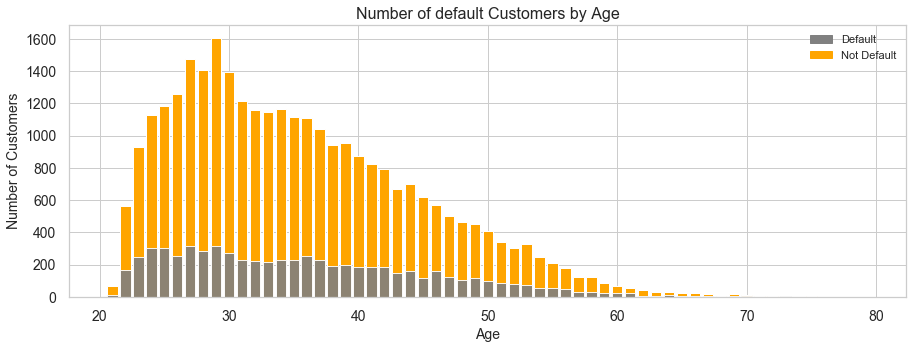

In [40]:

## Plot distribution of Age data with default, not default count
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))

# Plot the graph
d  = data['AGE'].value_counts()
x = data['AGE'][(data['DEFAULT_STATUS']=='default')].value_counts()
plt.bar(d.index, d, align='center', color='orange')
plt.bar(x.index, x, align='center', color='gray', alpha=0.9)

# Set X and y axis labels
plt.xlabel("Age", fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the legend
gray_patch = mpatches.Patch(color='gray', label='Default')
orange_patch=mpatches.Patch(color='orange', label='Not Default')
plt.legend(handles=[gray_patch,orange_patch],loc=1)

# Set the title
plt.title ("Number of default Customers by Age", fontsize=16)

In [41]:
Age_data= data.copy()
Age_data['Age_group'] = pd.cut(x = Age_data['AGE'], bins = [20,30,40,50,60,70,80],
                                       labels = ['20-30', '31-40','41-50','51-60','61-70','71-80'])
Cust_Agegroup  = Age_data['Age_group'].value_counts()
default_CustAge = Age_data['Age_group'][(Age_data['DEFAULT_STATUS']=='default')].value_counts()
print("Percentage of default customers in different Age group:\n", default_CustAge/Cust_Agegroup*100)

Percentage of default customers in different Age group:
 20-30    22.437120
31-40    20.433119
41-50    23.297252
51-60    25.237857
61-70    26.459144
71-80    33.333333
Name: Age_group, dtype: float64


### <span style='color:blue'> OBSERVATION:
#### <span style='color:blue'> 1. 33.33% of Customers between 71-80 default followed by 61-70, 51-60 etc.
#### <span style='color:blue'> 2. 20-30 age group has the most number of default customers

### Plot LIMIT_BAL vs DEFAULT_STATUS

Text(0.5, 1.0, 'Credit limit by default status')

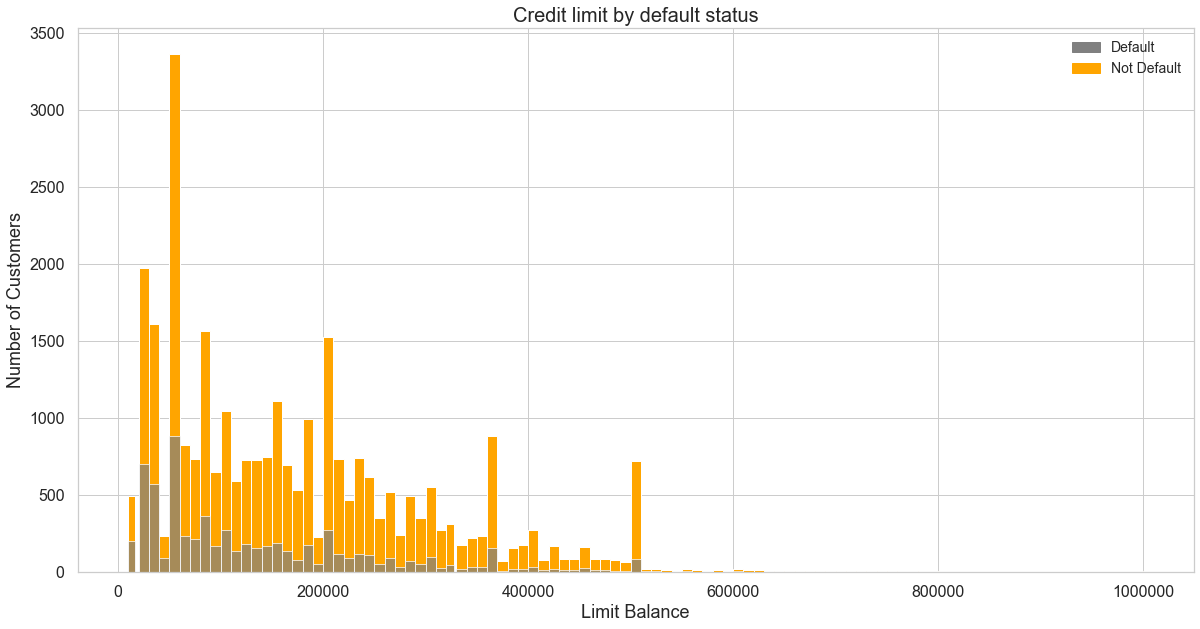

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))

# Plot the graph
plt.hist(data['LIMIT_BAL'], sorted(data['LIMIT_BAL'].unique()), color ='orange')
plt.hist(data['LIMIT_BAL'][(data['DEFAULT_STATUS']=='default')], sorted(data['LIMIT_BAL'].unique()),color='grey',alpha = 0.7)

# Set X and Y axis labels
plt.xlabel('Limit Balance',fontsize=18)
plt.ylabel('Number of Customers', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set the legend
gray_patch = mpatches.Patch(color='gray', label='Default')
orange_patch=mpatches.Patch(color='orange', label='Not Default')
plt.legend(handles=[gray_patch,orange_patch],loc=1,fontsize=14)

# Set the title
plt.title ("Credit limit by default status", fontsize=20)

In [43]:
limit_data= data.copy()
limit_data['limit_bucket'] = pd.cut(x = limit_data['LIMIT_BAL'], bins = [0,50000,100000,150000,200000,300000,400000,500000,1000000],
                                       labels = ['0-50k','51k-100k','101k-150k','151-200k','200k-300k','300-400k','400-500k','500k-1000k'])
limit_bucket  = limit_data['limit_bucket'].value_counts()
default_limitbucket = limit_data['limit_bucket'][(limit_data['DEFAULT_STATUS']=='default')].value_counts()
print("Percentage of default customers in different Age group:\n", default_limitbucket/limit_bucket*100)

Percentage of default customers in different Age group:
 0-50k         31.787389
51k-100k      25.798424
101k-150k     21.143004
151-200k      17.848165
200k-300k     16.050603
300-400k      14.063066
400-500k      12.140175
500k-1000k    11.165049
Name: limit_bucket, dtype: float64


### <span style='color:blue'> OBSERVATION:

#### <span style='color:blue'> 1. 31.7% of Customers with Credit limit less than 50k default.
#### <span style='color:blue'> 2. There are more number of default customers with credit limit less than 50k
    

## Plot PAY_1 to PAY_6 (Payment Status) vs DEFAULT_STATUS

#### Use 6 subplots to plot the number of default and non default customers for each value of Payment status

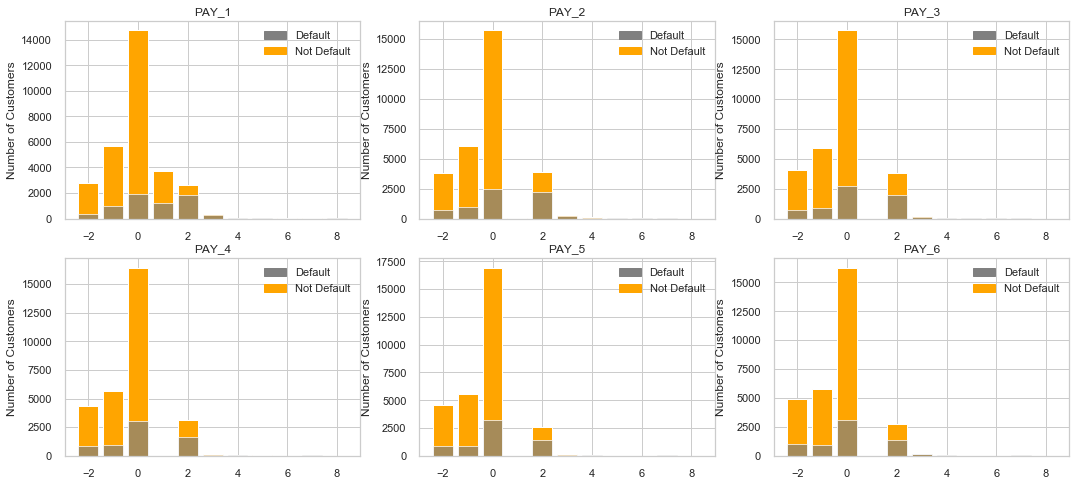

In [44]:
# List of all 6 columns
pay_status_columns =['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

# Set up subplots
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)

# Get each column and plot in subplots (0,0),(0,1),(0,2) first and then (1,0) (1,1) (1,2) using (i/3) and (i%3)
for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = data[pay_status_columns[i]].value_counts()
    x = data[pay_status_columns[i]][(data['DEFAULT_STATUS']=='default')].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='orange')
    ax[row,col].bar(x.index, x, align='center', color='gray', alpha=0.7)
    
    ax[row,col].set_ylabel("Number of Customers")
    ax[row,col].set_title(pay_status_columns[i])
    
    # Set the legend
    gray_patch = mpatches.Patch(color='gray', label='Default')
    orange_patch=mpatches.Patch(color='orange', label='Not Default')
    ax[row,col].legend(handles=[gray_patch,orange_patch],loc=1)
    

In [45]:
# Calculate percentage of not default for each value of latest payment status

def_pay1= data['PAY_1'][(data['DEFAULT_STATUS']=='not default')].value_counts()
total_pay1 = data['PAY_1'].value_counts()
Percentage= def_pay1/total_pay1*100
Percentage


 0    87.188709
-1    83.221949
 1    66.052061
-2    86.770569
 2    30.858643
 3    24.223602
 4    31.578947
 5    50.000000
 8    42.105263
 6    45.454545
 7    22.222222
Name: PAY_1, dtype: float64

### 6 subplots to plot the PERCENTAGE of default and non default customers for each value of PAYMENT STATUS

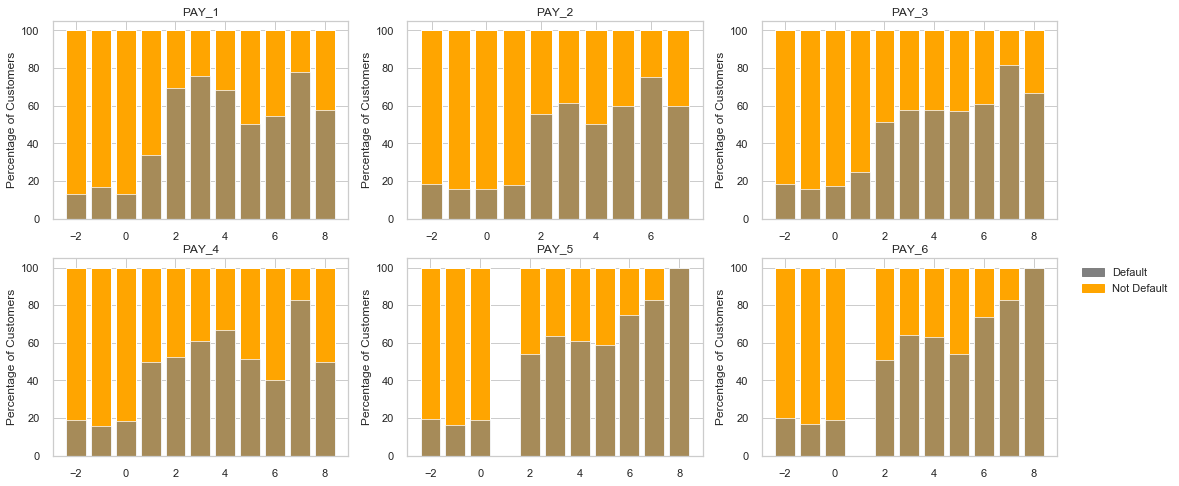

In [60]:
# List of all 6 columns
pay_status_columns =['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

# Set up subplots
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)

# Get each column and plot in subplots (0,0),(0,1),(0,2) first and then (1,0) (1,1) (1,2) using (i/3) and (i%3)
for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3


    filter = data[pay_status_columns[i]][(data['DEFAULT_STATUS']=='default')].unique()
    x= data[pay_status_columns[i]][(data['DEFAULT_STATUS']=='default')].value_counts()
    d  = data[pay_status_columns[i]][data[pay_status_columns[i]].isin (filter)].value_counts()
    percent=x/d*100
   
    ax[row,col].bar(d.index, 100, align='center', color='orange')
    ax[row,col].bar(percent.index, percent, align='center', color='gray',alpha=0.7)
    
    # Set X and Y axis labels, title
    ax[row,col].set_ylabel("Percentage of Customers")
    ax[row,col].set_title(pay_status_columns[i])
    
    # Set the legend
gray_patch = mpatches.Patch(color='gray', label='Default')
orange_patch=mpatches.Patch(color='orange', label='Not Default')
plt.legend(handles=[gray_patch,orange_patch],bbox_to_anchor=(1.05, 1))

    

### <span style='color:blue'> OBSERVATION:

#### <span style='color:blue'> 1.  If latest payment status (PAY_1) value=0 or -1,-2, they are more likely to be non default

#### <span style='color:blue'> 2.  If payment status is >2, they are mostly default (more than 50% of customers)
    
#### <span style='color:blue'>3. 87% of the Customers who have latest payment_status(PAY_1) as 0 are not default

### Plot PAY_AMT1 to PAY_AMT6 (Payment Amount) vs DEFAULT_STATUS

#### Use 6 subplots to plot the number of default and non default customers for each payment_amount

#### Setting y axis to log scale as we have wide range of values for payment amount

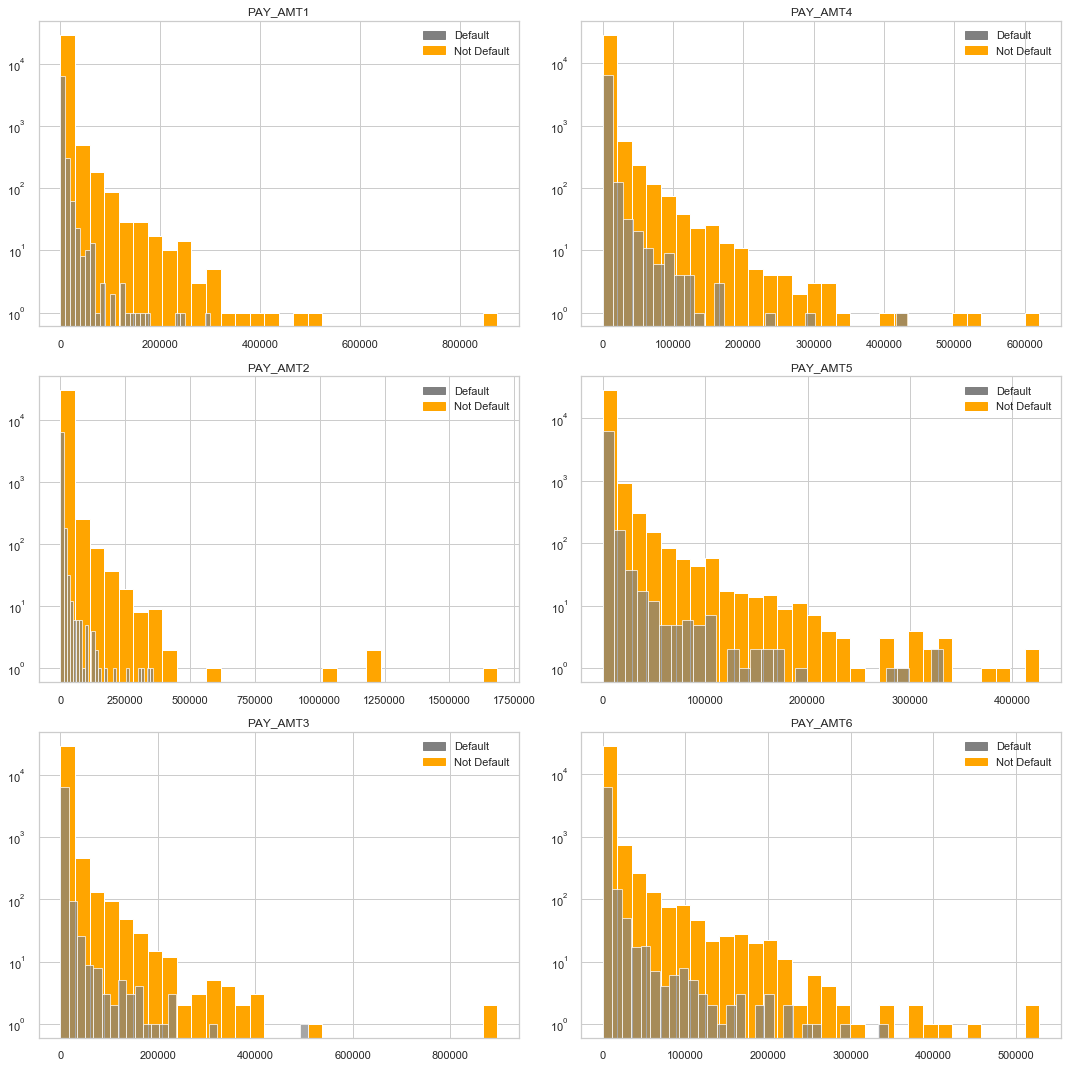

In [47]:
# List of all 6 columns
pay_amt_columns =['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

figure, ax = plt.subplots(3,2)
figure.set_size_inches(15,15)


for i in range(len(pay_amt_columns)):
    row,col =i%3, int(i/3)
   
    ax[row,col].hist(data[pay_amt_columns[i]], bins=30, color ='orange')
    ax[row,col].hist(data[pay_amt_columns[i]][(data['DEFAULT_STATUS']=='default')],bins=30,color='gray',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    ax[row,col].set_yscale('log', nonposy='clip')
    
   # Set the legend
    gray_patch = mpatches.Patch(color='gray', label='Default')
    orange_patch=mpatches.Patch(color='orange', label='Not Default')
    ax[row,col].legend(handles=[gray_patch,orange_patch],loc=1)
plt.tight_layout()
plt.show()

### Plot BILL_AMT1 to BILL_AMT6 (Bill amount) vs DEFAULT_STATUS


#### Use 6 subplots to plot the number of default and non default customers for each value of Bill amount

#### Setting y axis to log scale as we have wide range of values for bill amount

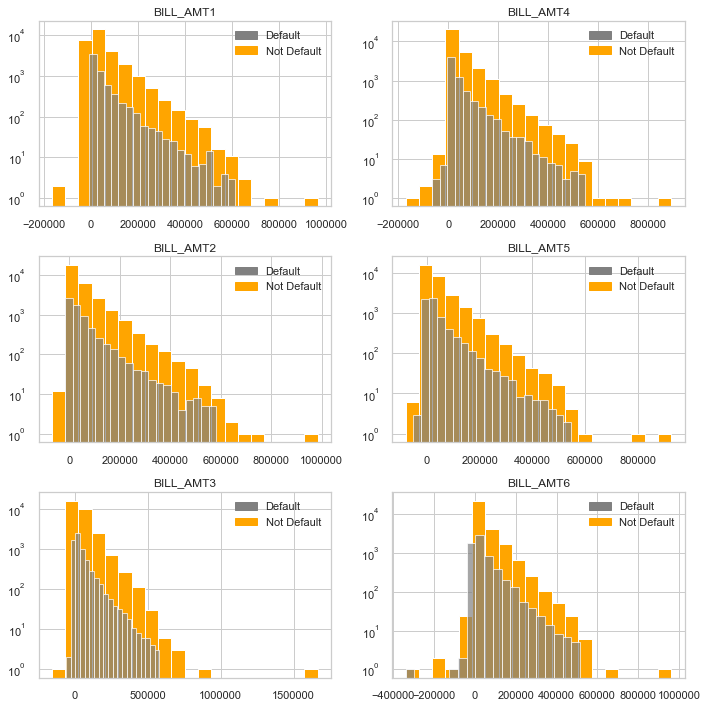

In [48]:
# List of all 6 columns
bill_amt_columns =['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

# Set up subplots
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)

# Get each column and plot in subplots (0,0),(0,1),(0,2) first and then (1,0) (1,1) (1,2) using (i/3) and (i%3)

for i in range(len(bill_amt_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(data[bill_amt_columns[i]], bins=20, color ='orange')
    ax[row,col].hist(data[bill_amt_columns[i]][(data['DEFAULT_STATUS']=='default')],bins=20,color='gray',alpha = 0.7)
    ax[row,col].set_title(bill_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
    
    # Set the legend
    gray_patch = mpatches.Patch(color='gray', label='Default')
    orange_patch=mpatches.Patch(color='orange', label='Not Default')
    ax[row,col].legend(handles=[gray_patch,orange_patch],loc=1)
    
plt.tight_layout()

## Summary of findings after initial EDA 

        

## <span style='color:brown'> Data Preprocessing:

#### 1. There are 30,000 records and 25 variables
#### 2. No nulls/ missing values/ duplicates
#### 3. Renamed the columns that were inconsistent/ not user friendly - PAY_0, SEX, default payment next month are changed to PAY_1, GENDER, DEFAULT_STATUS
#### 4. Irrelevant column with column name 'ID' is dropped
#### 5. Categorical columns of object data types (Gender, Education, Default_status) were one hot encoded to change into numerical columns for modeling




## <span style='color:brown'> Data Insights:

#### 1. Out of 30,000 Customers, 23,364 are not default and only 6636 Customers (22.12%) default.
#### 2. 60% of the Customers are female.
#### 3. 53.2% of the Customers are Single and 45% are married.
#### 4. Number of University graduated Customers are more
#### 5. 50% of the Customers are below 34 years and 72% of the Customers are below 40 years
#### 6. 25% of the Customers have credit limit less than 50,000 ,16% of the Customers have a credit limit over 50,000 and less than 100,000 and 26.2% have Credit limit over 100k-200k.  Overall, 50% of the Customers have credit limit less than 140k
#### 7. Almost 50% of the Customers have 0 (Revolving credit) as the latest repayment status
#### 8. 50% of the Customers have the latest outstanding bill amount of 22,381NT$
    


## <span style='color:brown'> Who are the customers that default?

#### 1. 20.7% of Female Customers default and 24.1% of male Customers default
            
#### 2. 26% of divorced Customers, 23.4% of married Customers and 20.9% of Single Customers default
    
  
#### 3. 25% of high school graduates, 23% of University graduates, 19.2% graduate school customers default
    
#### 4. 33.33% of Customers between 71-80 default followed by 61-70, 51-60 etc.
    
#### 5. 20-30 age group has the most number of default customers
    
#### 6. 31.7% of Customers with Credit limit less than 50k default.
    
#### 7. There are more number of default customers with credit limit less than 50k
    
    
#### 8. If latest payment status (PAY_1) value=0 or -1,-2, they are more likely to be non default

#### 9. If payment status is >2, they are mostly default (more than 50% of customers)
    
#### 10. 87% of the Customers who have payment_status as 0 are not default

## <span style='color:brown'>Correlation:

#### 1. Repayment  status(PAY_1 to PAY_6) are highly correlated to each other
#### 2. Bill amount (BILL_AMT1 to BILL_AMT6) are highly correlated to each other
#### 3. DEFAULT_STATUS is correlated to Payment status (PAY_1 to PAY_6) and LIMIT_BAL
#### 4. Payment amount( PAY_AMT1 to PAY_AMT6) are correlated to LIMIT_BAL
#### 5. Bill amount (BILL_AMT1 to BILL_AMT6) are correlated to LIMIT_BAL
#### 6. Bill amount is correlated to next month Payment amount (BILL_AMT6 to PAY_AMT5 and so on). BILL_AMT6 is Apr 2005 and PAY_AMT5 is May 2005
    
    

    
    


## <span style='color:brown'> Process:
    
#### In this project, our goal is to predict the credit limit for each customer so that they don't default. This is a a 
    
#### regression modeling problem with LIMIT_BAL as target variable.

#### 1. Exploratory data analysis to find the relationship between many variables and understand them better
#### 2. Scaling the data
#### 3. Feature Selection
#### 4. Regression modeling
#### 5. Performance metrics
#### 6. Hyperparameter tuning to improve the model performance
    

# To be continued:
    

    
#### 1.  Visualization and Statistics about the relationship of all variables with Target Variable LIMIT_BAL

#### LIMIT_BAL by Gender,Age, Marriage, Education and Default Status

#### 2. Comparing the relationships between any two variables, for example- Education and Credit limit
#### 3. Visualizing the relationship between many (more than 2) variables- For example -  - Age, Credit limit and Default status / Marital Status, Credit limit, Default Status
#### 4. Checking for collinearity or performing dimensionality reduction , Feature Selection

#### and then Regression Modeling
